In [176]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
plt.style.use(['ggplot'])


In [178]:

X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

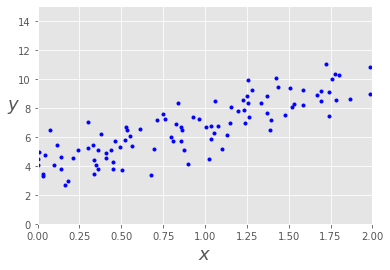

In [179]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

In [180]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.85227886]
 [3.06105649]]


In [181]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.85227886],
       [9.97439185]])

(0.0, 2.0, 0.0, 15.0)

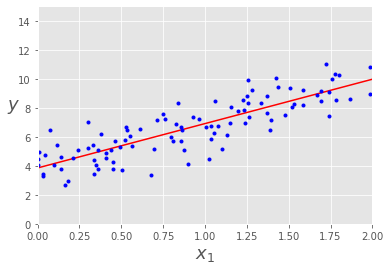

In [182]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

In [183]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [184]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [185]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.668,
Theta1:          3.234
Final cost/MSE:  5727.851


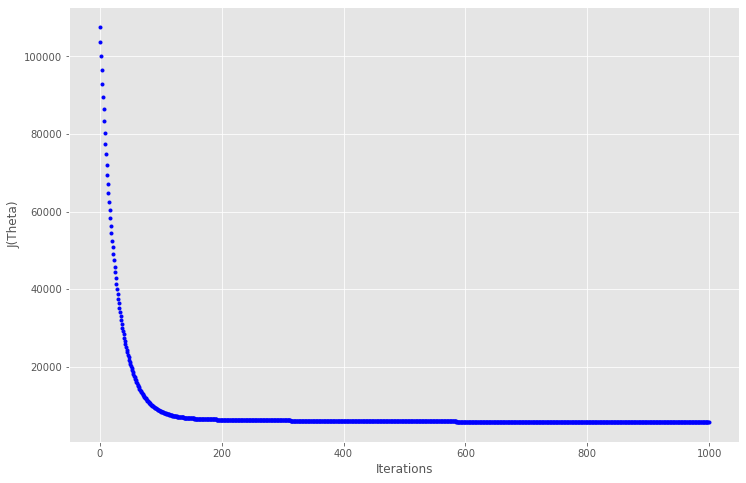

In [186]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

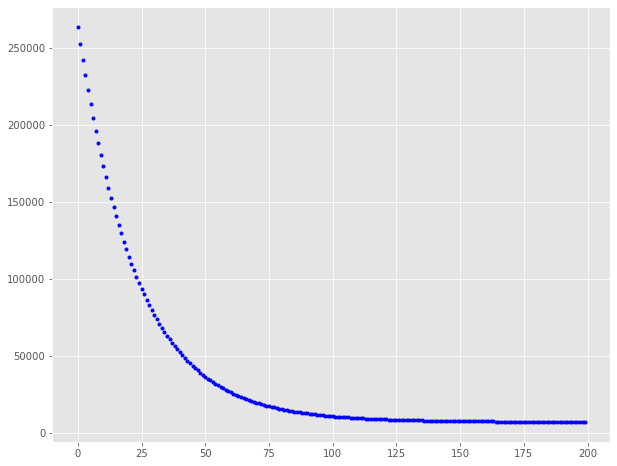

In [12]:

fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

In [202]:
def plot_GD(n_iter,lr,ax,ax1=None):
    """
    n_iter = no of iterations
    lr = Learning Rate
    ax = Axis to plot the Gradient Descent
    ax1 = Axis to plot cost_history vs Iterations plot

    """
    _ = ax.plot(X,y,'b.')
    theta = np.random.randn(2,1)

    tr =0.1
    cost_history = np.zeros(n_iter)
    for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
    if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')

ValueError: operands could not be broadcast together with shapes (100,1) (10,1) 

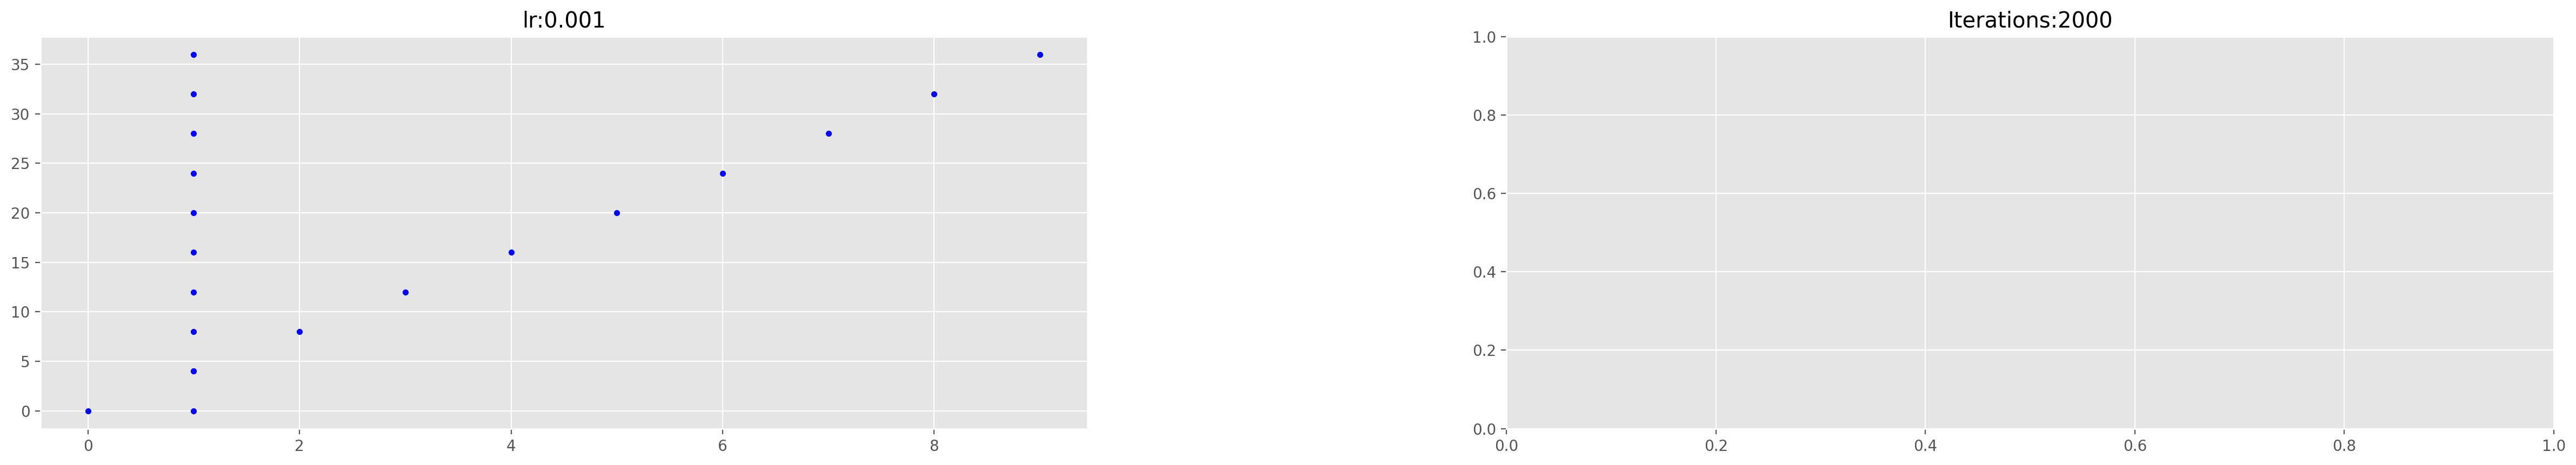

In [203]:

fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)

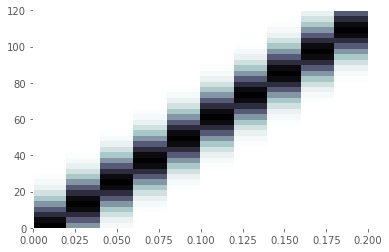

In [213]:
def make_gaussian(mu=20,sigma=3,bins=40):
    bins = np.arange(bins)
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))

Pr = np.zeros((40,10))

dt = .02
dp = 3
n_time = Pr.shape[1]
max_position = 120

time = np.arange(n_time) * dt
place_bin_edges = np.arange(0, max_position + dp, dp)
place_bin_centers = place_bin_edges[:-1] + np.diff(place_bin_edges) / 2

time_bin_edges = np.arange(n_time+1) * dt

t, p = np.meshgrid(time_bin_edges, place_bin_edges)

Pr = np.zeros((40,10))
for i in range(10):
    Pr[:,i] = make_gaussian(mu=i*4)
    
plt.pcolormesh(t, p, Pr,cmap=plt.cm.bone_r)

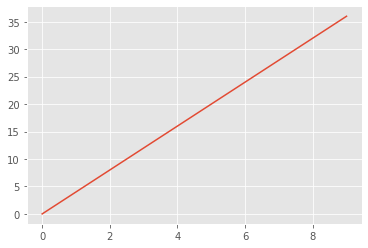

In [214]:
plt.plot(np.arange(Pr.shape[1]),np.argmax(Pr,axis=0))

In [196]:
def column_cycle_array(posterior, amt=None):
    """Also called 'position cycle' by Kloosterman et al.
    If amt is an array of the same length as posterior, then
    cycle each column by the corresponding amount in amt.
    Otherwise, cycle each column by a random amount."""
    out = copy.deepcopy(posterior)
    rows, cols = posterior.shape

    if amt is None:
        for col in range(cols):
            if np.isnan(np.sum(posterior[:,col])):
                continue
            else:
                out[:,col] = np.roll(posterior[:,col], np.random.randint(1, rows))
    else:
        if len(amt) == cols:
            for col in range(cols):
                if np.isnan(np.sum(posterior[:,col])):
                    continue
                else:
                    out[:,col] = np.roll(posterior[:,col], int(amt[col]))
        else:
            raise TypeError("amt does not seem to be the correct shape!")
    return out

def trajectory_score_array(posterior, slope=None, intercept=None, w=None, weights=None, normalize=False):
    """Docstring goes here
    This is the score that Davidson et al. maximizes, in order to get a linear trajectory,
    but here we kind of assume that that we have the trajectory already, and then just score it.
    w is the number of bin rows to include in score, in each direction. That is, w=0 is only the modes,
    and w=1 is a band of width=3, namely the modes, and 1 bin above, and 1 bin below the mode.
    The score is NOT averaged!"""

    rows, cols = posterior.shape

    if w is None:
        w = 0
    if not float(w).is_integer:
        raise ValueError("w has to be an integer!")
    if slope is None or intercept is None:
        slope, intercept, _ = linregress_array(posterior=posterior)

    x = np.arange(cols)
    line_y = np.round((slope*x + intercept)) # in position bin #s

    # idea: cycle each column so that the top w rows are the band surrounding the regression line

    if np.isnan(slope): # this will happen if we have 0 or only 1 decoded bins
        return np.nan
    else:
        temp = column_cycle_array(posterior, -line_y+w)

    if normalize:
        num_non_nan_bins = round(np.nansum(posterior))
    else:
        num_non_nan_bins = 1

    return np.nansum(temp[:2*w+1,:])/num_non_nan_bins
#     return temp[:2*w+1,:]

array([0.        , 0.73286185, 0.73286185, 0.73286185, 0.73286185,
       0.73286185, 0.73286185, 0.75884873, 0.75884873, 0.75884873])

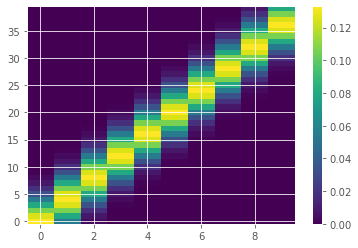

In [237]:
def sum_between_band(
    Pr,
    slope,
    intercept,
    band_width=7 # pixels 
):
    offset = band_width/2
    line_upper = (np.arange(Pr.shape[1])*slope+intercept)+offset
    line_lower = (np.arange(Pr.shape[1])*slope+intercept)-offset
    line_upper_int = np.around(line_upper).astype(int) # Find nearest position bin
    line_lower_int = np.around(line_lower).astype(int) # Find nearest position bin
    
    values = [Pr[line_lower_int[i]:line_upper_int[i],i] for i in range(Pr.shape[1])]
#     return np.hstack(values).sum()
    sums = [np.nansum(v) for v in values]

    return  np.array(sums)

values = sum_between_band(Pr,theta[1],theta[0])

plt.imshow(Pr,aspect='auto',origin='lower')
plt.colorbar()
# plt.plot(line_upper_int)
# plt.plot(line_lower_int)
# plt.ylim(0,40)
values

In [145]:
7*3

21

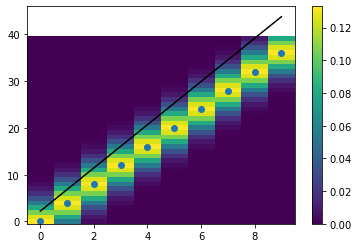

Done!


In [171]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats
from nelpy.analysis import replay
import copy

def gradient_descent_2(Pr,alpha, x, y, numIterations):
    m = x.shape[0] # number of samples
    theta = np.ones(2)
    x_transpose = x.transpose()
    for iter in range(0, numIterations):

        loss = -sum_between_band(Pr,theta[1],theta[0])

        J = np.sum(loss ** 2) / (2 * m)  # cost
#         print("iter %s | J: %.3f" % (iter, J))   
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    return theta


# x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
#                     random_state=0, noise=35) 

# plt.plot(np.arange(Pr.shape[1]),np.argmax(Pr,axis=0))

x = np.arange(Pr.shape[1])
x = np.expand_dims(x, axis=0).T
y = np.argmax(Pr,axis=0).T

m, n = np.shape(x)
x = np.c_[ np.ones(m), x] # insert column
alpha = 0.01 # learning rate
theta = gradient_descent_2(Pr,alpha, x, y, 1000)

# plot
for i in range(x.shape[1]):
    y_predict = theta[0] + theta[1]*x 
    
plt.imshow(Pr,aspect='auto',origin='lower')
plt.colorbar()    
plt.plot(x[:,1],y,'o')
plt.plot(x,y_predict,'k-')
plt.show()
print("Done!")

In [347]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost


def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
#         theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        cost = -sum_between_band(Pr,theta[1],theta[0])
        cost = np.expand_dims(cost, axis=0).T
        theta = theta -(1/m)*learning_rate*( X.T.dot(cost))

        theta_history[it,:] = theta.T

        cost_history[it] = -trajectory_score_array(Pr, slope=theta[1], intercept=theta[0], w=3)
    return theta, cost_history, theta_history



lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

x = np.arange(Pr.shape[1])
x = np.expand_dims(x, axis=0).T
y = np.argmax(Pr,axis=0)
y = np.expand_dims(y, axis=0).T

m, n = np.shape(x)
x = np.c_[ np.ones(m), x] # insert column

# X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(x,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.750,
Theta1:          5.547
Final cost/MSE:  -0.613


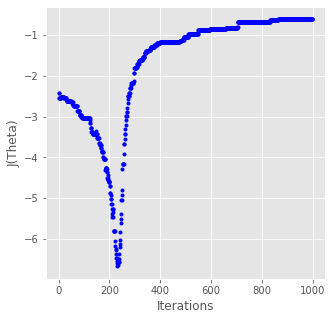

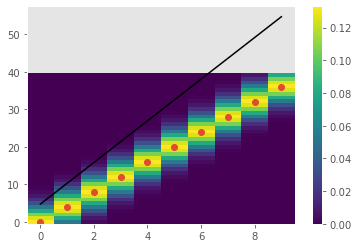

In [348]:
fig,ax = plt.subplots(figsize=(5,5))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')



y_predict = theta[0] + theta[1]*x 
plt.figure()
plt.imshow(Pr,aspect='auto',origin='lower')
plt.colorbar()    
plt.plot(x[:,1],y,'o')
plt.plot(x,y_predict,'k-')
plt.grid()
plt.show()


In [340]:
np.random.randn(2,1)

array([[-1.83159251],
       [-0.60479849]])